#PRINCIPAL COMPONENT ANALYSIS (PCA)

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [6]:
dataset = pd.read_excel('./Real estate valuation data set.xlsx')
dataset.head()
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# Splitting the dataset into Training Set and Testing Set

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

# The Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit(X_train)
X_test = pca.transform(X_test)

# Visualize the Principle Components

Text(0, 0.5, 'Second Principle Component')

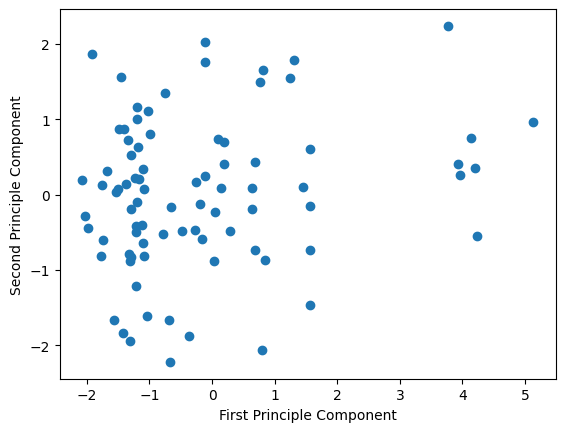

In [45]:
plt.scatter(X_test[:,0],X_test[:,1])
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

# Investigating at the Principal Components

In [15]:
pca.components_[0]

array([-0.01632324,  0.05830399,  0.02244355,  0.5730926 , -0.45914347,
       -0.44036714, -0.51250309])

# Training the L1 Regressor Model on the Training Set

In [53]:
from sklearn import linear_model
L1 = linear_model.Lasso()
L1.fit(X_train,y_train)

TypeError: ignored

# Training the L2 Regression Model on the Training Set

In [ ]:
L2 = linear_model.Ridge()
L2.fit(X_train,y_train)

# Predicting the Test Set Results

In [ ]:
y1_pred = L1.predict(X_test)
y2_pred = L2.predict(X_test)

# Visualising the Training Set Results with PCA

In [ ]:
plt.scatter(X_train,y_train, color = 'red')
plt.plot(X_train, L1.predict(X_train), color = 'violet')
plt.scatter(X_test[:,0],X_test[:,1], color = 'blue')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.title('PCA Lasso')
plt.show()

In [ ]:
plt.scatter(X_train,y_train, color = 'red')
plt.plot(X_train, L2.predict(X_train), color = 'green')
plt.scatter(X_test[:,0],X_test[:,1], color = 'blue')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.title('PCA Ridge')
plt.show()

# Visualizing the Test Set Results

In [ ]:
plt.scatter(X_test,y_test, color = 'red')
plt.plot(X_test, L1.predict(X_test), color = 'violet')
plt.scatter(X_test[:,0],X_test[:,1], color = 'blue')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.title('PCA Lasso')
plt.show()

In [ ]:
plt.scatter(X_test,y_test, color = 'red')
plt.plot(X_test, L2.predict(X_test), color = 'green')
plt.scatter(X_test[:,0],X_test[:,1], color = 'blue')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.title('PCA Lasso')
plt.show()

# Compare Performance Metrics of L1 and L2

# Mean Absolute Error (MAE)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('L1_MAE: ', mean_absolute_error(y_test, y1_pred))
print('L2_MAE: ', mean_absolute_error(y_test, y2_pred))

# Mean Squared Error (MSE)

In [ ]:
print('L1_MSE: ', mean_squared_error(y_test, y1_pred))
print('L2_MSE: ', mean_squared_error(y_test, y2_pred))

# Root Mean Squared Error (RMSE)

In [ ]:
print('L1_RMSE: ', mean_squared_error(y_test, y1_pred, squared=False))
print('L2_RMSE: ', mean_squared_error(y_test, y2_pred, squared=False))

# R-Squared

In [ ]:
print('L1_r2: ', r2_score(y_test, y1_pred))
print('L2_r2: ', r2_score(y_test, y2_pred)

# Adjusted R-Squared

In [ ]:
L1_adj_r2 = 1 - (1-L1_r2)*(len(y)-1)/(len(y) - X.shape[1] - 1)
L2_adj_r2 = 1 - (1-L2_r2)*(len(y)-1)/(len(y) - X.shape[1] - 1)
print('L1_adj_r2: ', L1_adj_r2)
print('L2_adj_r2: ', L2_adj_r2)